## scikit-learn で2変数の線形回帰(重回帰)

scikit-learnを使えば手軽に線形回帰を実践できるので、備忘録として残しておきます。scikit-learnを用いれば、学習(fitting)や予測(predict)など手軽行うことが出来ます。ここでは2つの説明変数の場合の線形回帰をscikit-learnを用いて実行してみます。2変数なので重回帰といわれる回帰です。説明変数が一つの場合は単回帰といわれます。

### sickit-learn 解説目次

1. 公式データセット
2. データの作成
3. [線形回帰](/article/library/sklearn/linear_regression/) <= 本節
4. ロジスティック回帰

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/article/library/sklearn/linear_regression/lr_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/article/library/sklearn/linear_regression/lr_nb.ipynb)

### 筆者の環境
筆者のOSはmacOSです。LinuxやUnixのコマンドとはオプションが異なります。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G2022


In [2]:
!python -V

Python 3.7.3


必要なライブラリを読み込みます。

In [3]:
import numpy as np
import scipy
from scipy.stats import binom

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("numpy version :", np.__version__)
print("matplotlib version :", matplotlib.__version__)
print("sns version :",sns.__version__)

numpy version : 1.16.2
matplotlib version : 3.0.3
sns version : 0.9.0


In [4]:
import sklearn

sklearn.__version__

'0.20.3'

### データの取得
説明変数を二つの場合の線形回帰を実行します。
利用するデータは、sklearnのdatasetsを使ってもいいのですが、練習もかねて自分で作って見ます。

データセットは以下の様に利用できます。以下では、ボストンの土地価格のデータを読み込んでいます。scikit-learnの公式ページの説明もこのデータセットを利用していると記憶しています。


In [5]:
from sklearn.datasets import load_boston

boston = load_boston()

### データの作成
以下の様な線形回帰の式を想定します。
説明変数が二つ、目的変数が一つです。

$$
y = a_0 + a_1 * x_1 + a_2 * x_2
$$

データ作成において、$a_0=5, a_1=2, a_2=1$を仮定し、それに少々正規分布に従う乱数を追加します。

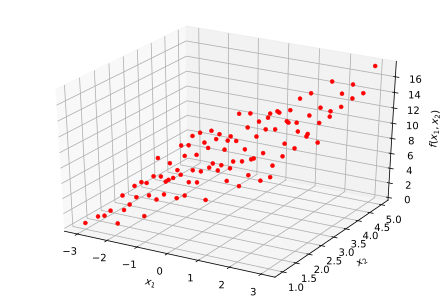

In [6]:
from mpl_toolkits.mplot3d import Axes3D

x1 = [0.01 * i for i in range(100)]
x2 = [0.01 * i for i in range(100)]

x1 = np.linspace(-3,3,10)
x2 = np.linspace(1,5,10)

# 配列の個々の要素に対して乱数を追加したいので、ブロードキャストをキャンセルする
# a_0=5, a_1=2, a_2=1
def get_y(x1, x2):
  return np.array([
    [2 * __x1 + __x2 + np.random.randn() + 5 for __x1, __x2 in zip(_x1,_x2)] for _x1, _x2 in zip(x1,x2)
  ])

X1, X2 = np.meshgrid(x1, x2)
Y = get_y(X1, X2)

X1 = X1.reshape(-1)
X2 = X2.reshape(-1)
Y = Y.reshape(-1)

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1, x_2)$")

# ax.plot_wireframe(X1, X2, Y)
ax.plot(X1, X2, Y, "o", color="#ff0000", ms=4, mew=0.5)


In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = np.array([
  X1,
  X2
]).T

print(X.shape)
print(Y.shape)
lr.fit(X,Y)

print('係数 : ',lr.coef_)
print('オフセット', lr.intercept_)

(100, 2)
(100,)
係数 :  [2.01485573 1.03137701]
オフセット 4.967149651408958


となり、パラメタ$a_0,a_1,a_2$が得られます。結果として、以下の様な線形回帰の式が得られます。

$$
y = 5 + 2 * x_1 + x_2
$$

このパラメタを使って、新たにテストデータを作成し、平均二乗誤差を計算してみます。

In [8]:
from sklearn.metrics import mean_squared_error

Y_predict = lr.predict(X)
print("MSE : {:.2f}".format(mean_squared_error(Y_predict, Y)))

MSE : 0.81


となります。とても簡単ですね。sklearn、素晴らしいです。

## まとめ
線形回帰だけでも多くの事がわかります。また、データ分析の実務では、複雑なモデルより簡単なモデルの方が好かれますデータ分析によらないと思いますが･･･）。線形回帰で説明できるのなら、それで十分な気もしています。